## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## Reading And Displaying Data

In [2]:
Student = pd.read_csv("dataset.csv")
Student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 1- Data preprocessing & Visualization

In [3]:
Student.info() or Student.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [4]:
Student["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

## Encode Target

In [5]:
dic = {"Dropout":0,"Enrolled":1,"Graduate":2}
Student["Target"] = Student["Target"].map(dic)
Student["Target"].value_counts()


Target
2    2209
0    1421
1     794
Name: count, dtype: int64

## Visualization

<Axes: xlabel='Target'>

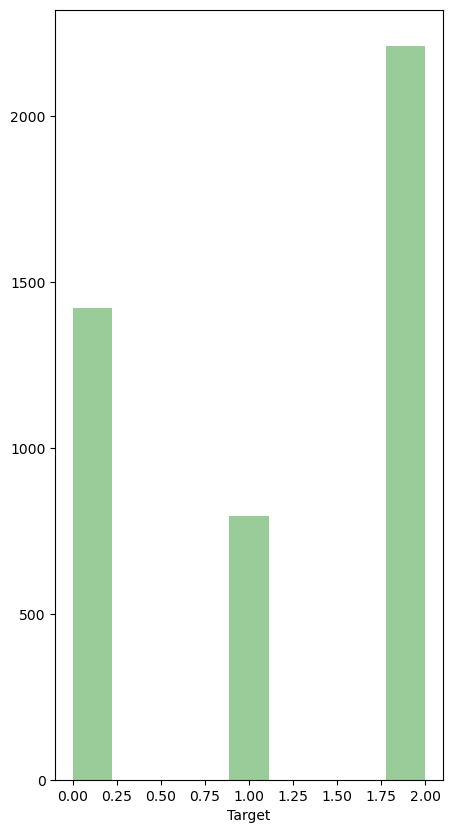

In [6]:
plt.figure(figsize=(5,10))
sns.distplot(Student["Target"],color="g",kde=False)

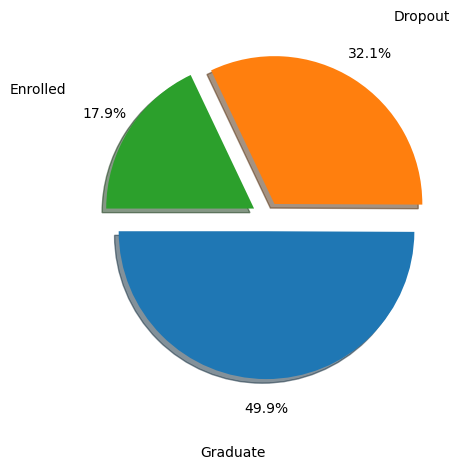

In [7]:
plt.pie(Student['Target'].value_counts(),labels=('Graduate','Dropout','Enrolled'),
        explode = [0.1,0.1,0.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

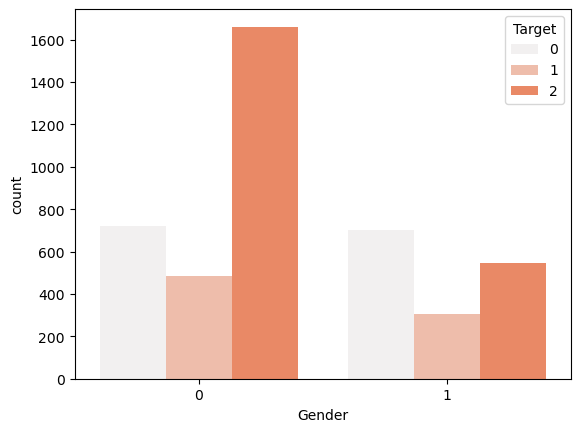

In [8]:
sns.countplot(Student,x='Gender',hue="Target",color="coral")

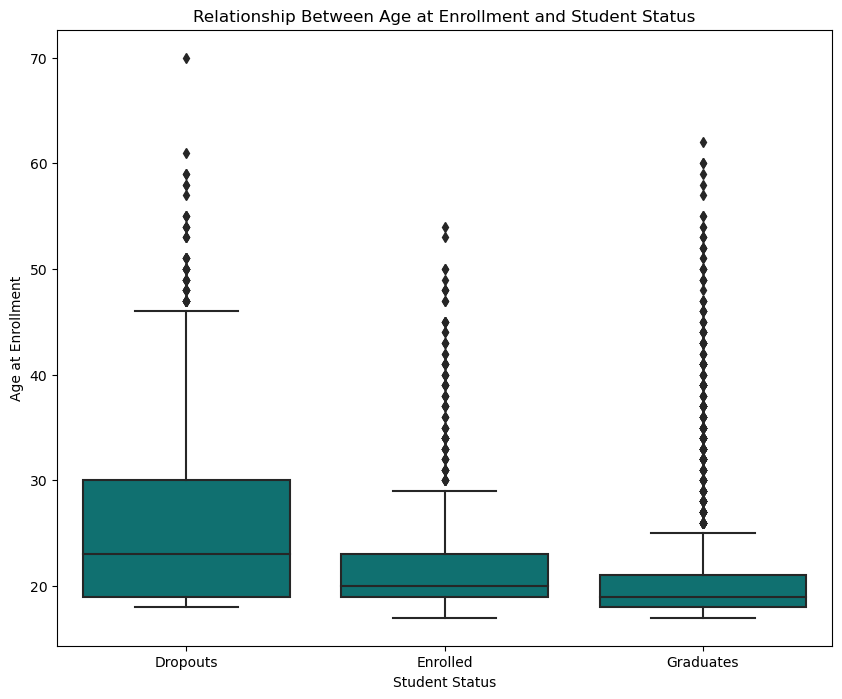

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Target', y='Age at enrollment', data=Student,color="teal")
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Student Status')
plt.show()

Text(0, 0.5, 'Count')

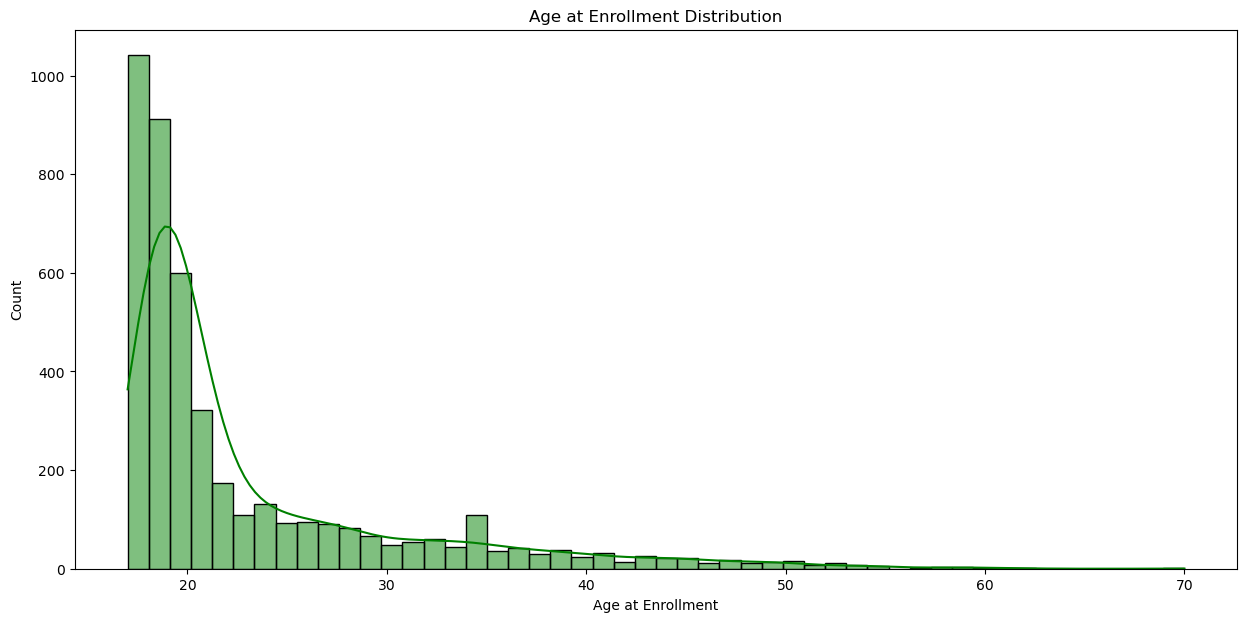

In [10]:
Student['Age at enrollment'] = Student['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(15, 7))
ax = sns.histplot(Student['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
# right skewed distribution
# mode -- median -- mean 

Text(0.5, 1.0, 'Impact of Tuition Fees Status on Student Educational Status')

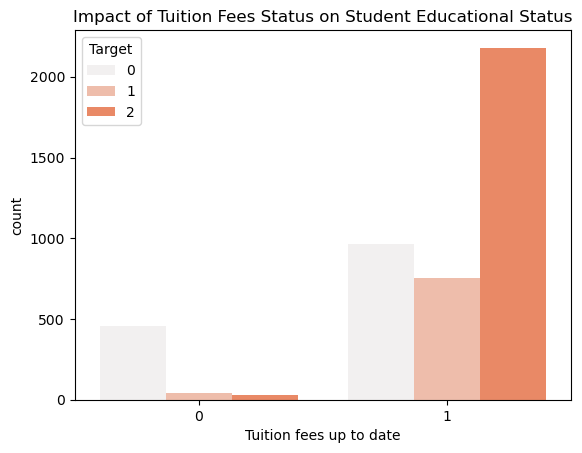

In [11]:
sns.countplot(Student,x='Tuition fees up to date',hue="Target",color="coral")
plt.title("Impact of Tuition Fees Status on Student Educational Status")

Text(0.5, 1.0, 'Impact of Financial Aids on Student Educational Status')

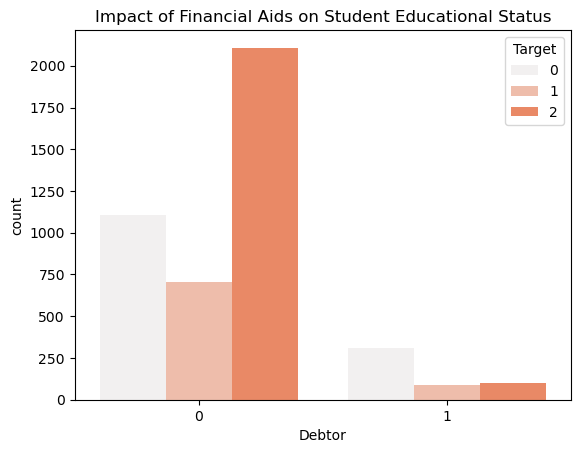

In [12]:
sns.countplot(Student,x='Debtor',hue="Target",color="coral")
plt.title("Impact of Financial Aids on Student Educational Status")

Text(0.5, 1.0, 'Impact of Financial Obligations on Student Educational Status')

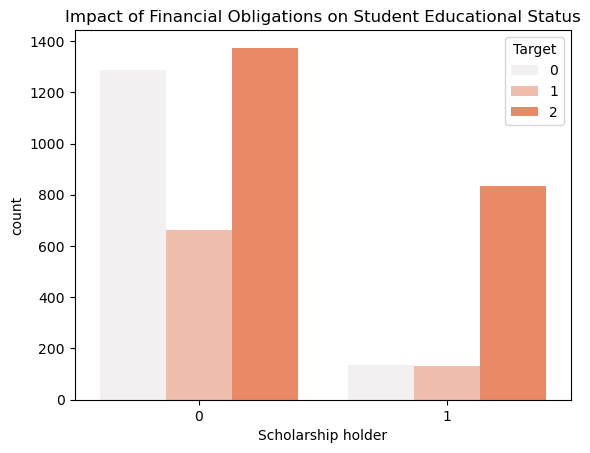

In [13]:
sns.countplot(Student,x='Scholarship holder',hue="Target",color="coral")
plt.title("Impact of Financial Obligations on Student Educational Status")

## Calculate correlation between features and target variable


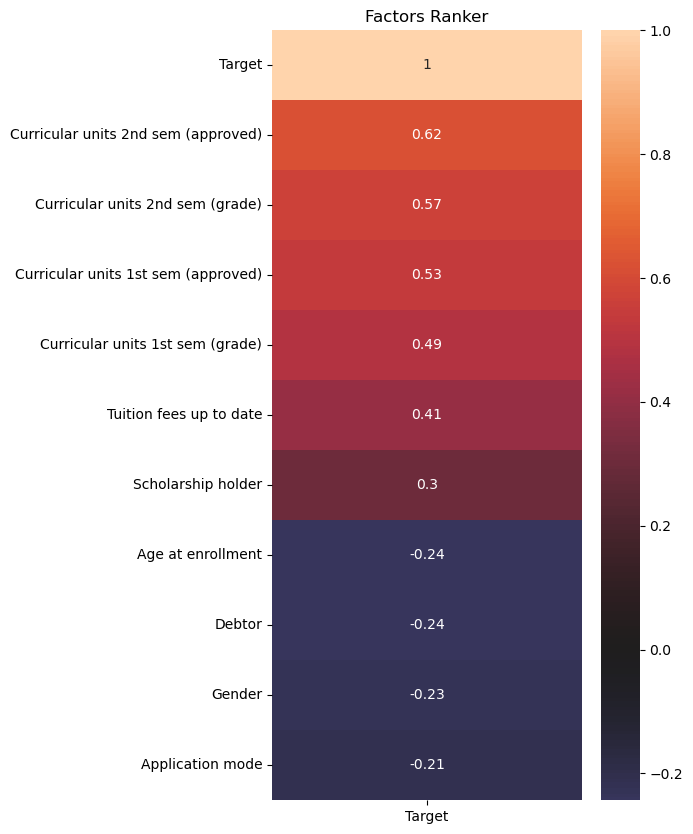

In [14]:
correlations = Student.corr()['Target'].drop('Target')

top_10_features = correlations.abs().nlargest(10).index

top_10_df = Student[top_10_features.to_list() + ['Target']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Target']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Target', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()


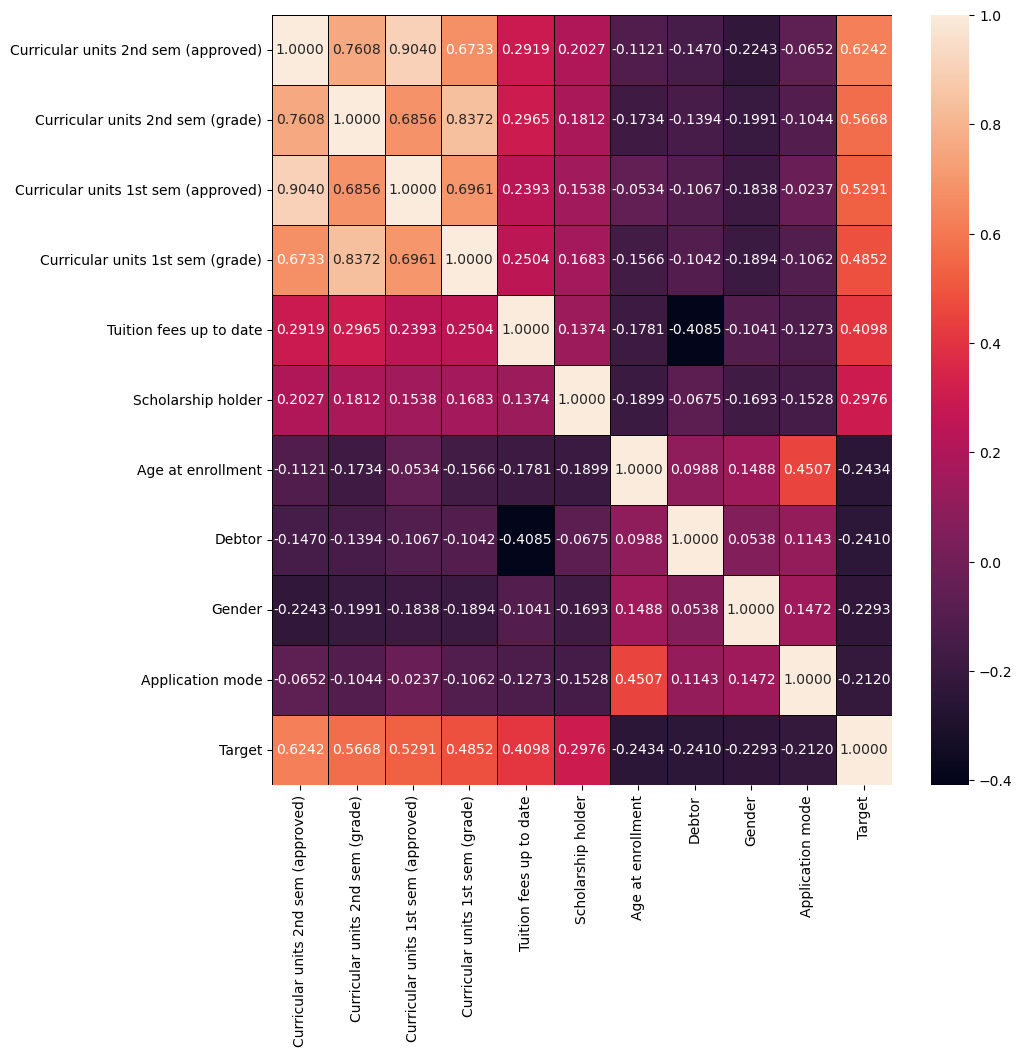

In [15]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(top_10_df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

## order by correlation


In [16]:
correlation = Student.corrwith(Student['Target']).abs().sort_values(ascending=False)
print(correlation)
num_features = len(Student.columns) + 1
selected_features = correlation.index[:num_features]

Student = Student[selected_features]
Student.head()


Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Age at enrollment                                 0.243438
Debtor                                            0.240999
Gender                                            0.229270
Application mode                                  0.212025
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (without evaluations)    0.094028
Curricular units 2nd sem (evaluations)            0.092721
Previous qualification                            0.0913

,Target,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Scholarship holder,Age at enrollment,Debtor,Gender,...,Curricular units 1st sem (evaluations),GDP,Mother's qualification,Inflation rate,Unemployment rate,Course,Educational special needs,Nacionality,International,Father's qualification
0,0,0,0.000000,0,0.000000,1,0,20,0,1,...,0,1.74,13,1.4,10.8,2,0,1,0,10
1,2,6,13.666667,6,14.000000,0,0,19,0,1,...,6,0.79,1,-0.3,13.9,11,0,1,0,3
2,0,0,0.000000,0,0.000000,0,0,19,0,1,...,0,1.74,22,1.4,10.8,5,0,1,0,27
3,2,5,12.400000,6,13.428571,1,0,20,0,0,...,8,-3.12,23,-0.8,9.4,15,0,1,0,27
4,2,6,13.000000,5,12.333333,1,0,45,0,0,...,9,0.79,22,-0.3,13.9,3,0,1,0,28


## Drop Columns That Not Important

In [17]:
Student = Student.drop(columns=['Nacionality', 
                                  'Mother\'s qualification', 
                                  'Father\'s qualification', 
                                  'Educational special needs', 
                                  'International', 
                                  'Curricular units 1st sem (without evaluations)',
                                  'Unemployment rate', 
                                  'Inflation rate'], axis=1)
Student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Target                                          4424 non-null   int64  
 1   Curricular units 2nd sem (approved)             4424 non-null   int64  
 2   Curricular units 2nd sem (grade)                4424 non-null   float64
 3   Curricular units 1st sem (approved)             4424 non-null   int64  
 4   Curricular units 1st sem (grade)                4424 non-null   float64
 5   Tuition fees up to date                         4424 non-null   int64  
 6   Scholarship holder                              4424 non-null   int64  
 7   Age at enrollment                               4424 non-null   int64  
 8   Debtor                                          4424 non-null   int64  
 9   Gender                                   

## The output can be drop or graduated -> binary classification

In [18]:
Student.drop(Student[Student["Target"]==1].index,inplace=True)

Student["Target"]=Student["Target"].map({0:0,2:1})

Student["Target"].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

## Dealing with outliers

In [19]:
# Determine the threshold based on the 75th percentile of 'Age at enrollment'
age_threshold = Student["Age at enrollment"].quantile(0.75)

# Drop rows where 'Age at enrollment' is greater than or equal to the threshold
Student.drop(Student[Student["Age at enrollment"] >= age_threshold].index, inplace=True)


In [20]:
Student.shape[0]

2654

# 2- Model building

In [21]:
from sklearn.model_selection import train_test_split

X = Student.drop('Target', axis=1)
y = Student['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

accuracy_scores = {'Classifier': [], 'Training Accuracy': [], 'Testing Accuracy': [], 'Precision': [], 'Recall': []}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    Training_Accuracy = clf.score(X_train, y_train)*100
    Testing_Accuracy = clf.score(X_test, y_test)*100

    predictions = clf.predict(X_test)
    recall = recall_score(y_test, predictions)*100
    precision = precision_score(y_test, predictions)*100 
    
    accuracy_scores['Classifier'].append(clf_name)
    accuracy_scores['Training Accuracy'].append(Training_Accuracy)
    accuracy_scores['Testing Accuracy'].append(Testing_Accuracy)
    accuracy_scores['Precision'].append(precision)
    accuracy_scores['Recall'].append(recall)

accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df

,Classifier,Training Accuracy,Testing Accuracy,Precision,Recall
0,Logistic Regression,91.097504,90.772128,89.382716,98.369565
1,KNN,89.307584,84.180791,83.971292,95.380435
2,Decision Tree,100.000000,84.934087,89.560440,88.586957
3,Random Forest,100.000000,89.265537,89.567430,95.652174
4,Naive Bayes,85.256712,83.804143,86.153846,91.304348


# 3- Optimization

## 1- Optimizing using pipelining

### Preparing pipelining

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
  
numeric_features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 
                    'Curricular units 1st sem (grade)', 'Tuition fees up to date','Scholarship holder','Age at enrollment',
                    'Debtor', 'Gender', 'Application mode' , 'Curricular units 2nd sem (enrolled)' , 'Curricular units 1st sem (enrolled)' , 
                    'Displaced' , 'Curricular units 2nd sem (without evaluations)' , 'Curricular units 2nd sem (evaluations)' , 
                    'Previous qualification' , 'Marital status' , 'Application order' , 'Daytime/evening attendance' , 
                    'Curricular units 2nd sem (credited)' , "Father's occupation" , "Mother's occupation" , "Curricular units 1st sem (credited)" , 
                    'Curricular units 1st sem (evaluations)' , 'GDP' , 'Course']

categorical_features = []

# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),# Impute missing values with the median of the column
    ('scaler', StandardScaler())# Standardize features to have a mean of zero and a standard deviation of one
])

# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),# Impute missing values with the string 'Unknown'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))# Encode categorical features as a one-hot numeric array, ignoring unknown categories during transformation
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
for clf_name, clf in classifiers.items():
    
    pip_classifier = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    
    pip_classifier.fit(X_train, y_train)
    Training_Accuracy = pip_classifier.score(X_train, y_train)*100
    Testing_Accuracy = pip_classifier.score(X_test, y_test)*100

    predictions = pip_classifier.predict(X_test)
    recall = recall_score(y_test, predictions)*100
    precision = precision_score(y_test, predictions)*100 
    
    
    accuracy_scores.setdefault('Training Accuracy Pipeline', []).append(Training_Accuracy)
    accuracy_scores.setdefault('Testing Accuracy Pipeline', []).append(Testing_Accuracy)


accuracy_df = pd.DataFrame(accuracy_scores)
accuracy_df

,Classifier,Training Accuracy,Testing Accuracy,Precision,Recall,Training Accuracy Pipeline,Testing Accuracy Pipeline
0,Logistic Regression,91.097504,90.772128,89.382716,98.369565,91.238813,90.583804
1,KNN,89.307584,84.180791,83.971292,95.380435,90.861988,86.629002
2,Decision Tree,100.000000,84.934087,89.560440,88.586957,100.000000,84.745763
3,Random Forest,100.000000,89.265537,89.567430,95.652174,100.000000,89.453861
4,Naive Bayes,85.256712,83.804143,86.153846,91.304348,85.256712,83.804143


## 2- Optimizing using ensemble methods

In [29]:
from sklearn.ensemble import VotingClassifier

# Combining multiple models into an ensemble VotingClassifier to improve prediction accuracy
ensemble = VotingClassifier(estimators=[(name, model) for name, model in classifiers.items()], voting='soft')

ensemble.fit(X_train, y_train)

acc=ensemble.score(X_test, y_test)*100
print("Accuracy with soft voting:", accuracy)


Accuracy with soft voting: 89.6421845574388


In [26]:
from sklearn.ensemble import VotingClassifier

# Combining multiple models into an ensemble VotingClassifier to improve prediction accuracy
ensemble = VotingClassifier(estimators=[(name, model) for name, model in classifiers.items()], voting='hard')

ensemble.fit(X_train, y_train)

accuracy = ensemble.score(X_test, y_test) * 100
print("Accuracy with hard voting:", accuracy)


Accuracy with hard voting: 89.6421845574388


# 4- Model Evaluation

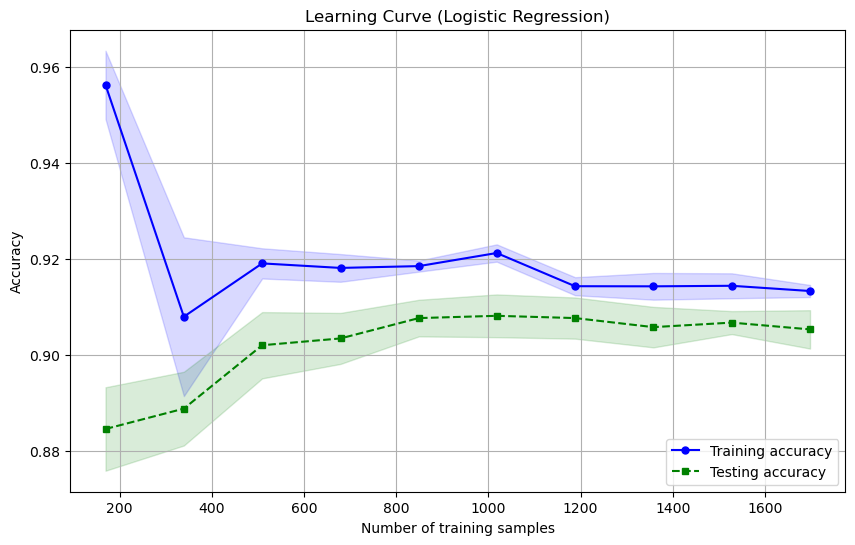

In [27]:
from sklearn.model_selection import learning_curve

# Assuming Logistic Regression is the best performing classifier
best_classifier = LogisticRegression(C=0.1, penalty='l2')  # Assuming the best parameters

# Define the learning curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_classifier,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Calculate mean and standard deviation of training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))

# Plot learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Testing accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Add labels, title, and legend
plt.title('Learning Curve (Logistic Regression)')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


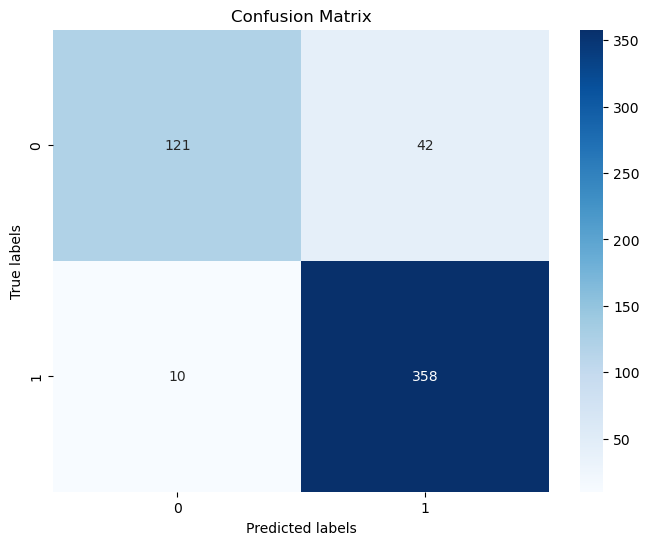

In [28]:
from sklearn.metrics import confusion_matrix

# Train the Logistic Regression model with the best parameters using the entire training dataset
best_classifier.fit(X_train, y_train)

# Predict labels for the test dataset
y_pred = best_classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()
